# Numerical Simulation Laboratory

# Numerical exercise 7 
[...]

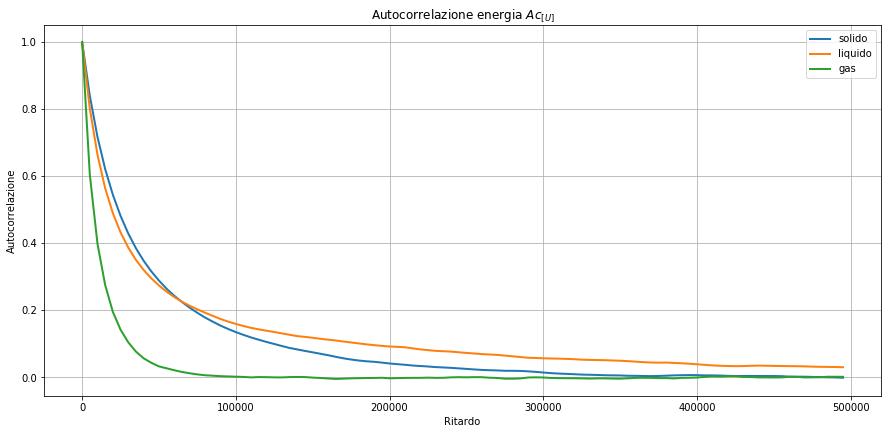

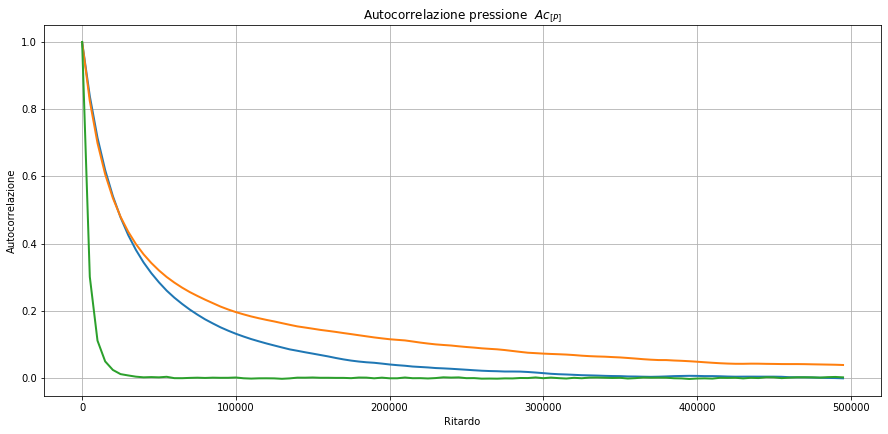

In [50]:
import math
import numpy as np
import matplotlib.pyplot as plt

#solido
L, Es = np.loadtxt('Files/solid/Autocorr_ene.out', delimiter=' ', unpack=True)
L, Ps = np.loadtxt('Files/solid/Autocorr_pres.out', delimiter=' ', unpack=True)
#liquido
L, El = np.loadtxt('Files/liquid/Autocorr_ene.out', delimiter=' ', unpack=True)
L, Pl = np.loadtxt('Files/liquid/Autocorr_pres.out', delimiter=' ', unpack=True)
#gas
L, Eg = np.loadtxt('Files/gas/Autocorr_ene.out', delimiter=' ', unpack=True)
L, Pg = np.loadtxt('Files/gas/Autocorr_pres.out', delimiter=' ', unpack=True)

plt.figure(figsize=(15, 15))
plt.subplot(211)
plt.plot(L, Es, lw=2, label='solido')
plt.plot(L, El, lw=2, label='liquido')
plt.plot(L, Eg, lw=2, label='gas')
plt.title('Autocorrelazione energia $Ac_{[U]}$')
plt.xlabel('Ritardo')
plt.ylabel('Autocorrelazione')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 15))
plt.subplot(212)
plt.plot(L, Ps, lw=2, label='solido')
plt.plot(L, Pl, lw=2, label='liquido')
plt.plot(L, Pg, lw=2, label='gas')
plt.title('Autocorrelazione pressione  $Ac_{[P]}$')
plt.xlabel('Ritardo')
plt.ylabel('Autocorrelazione')
plt.grid(True)
plt.show()

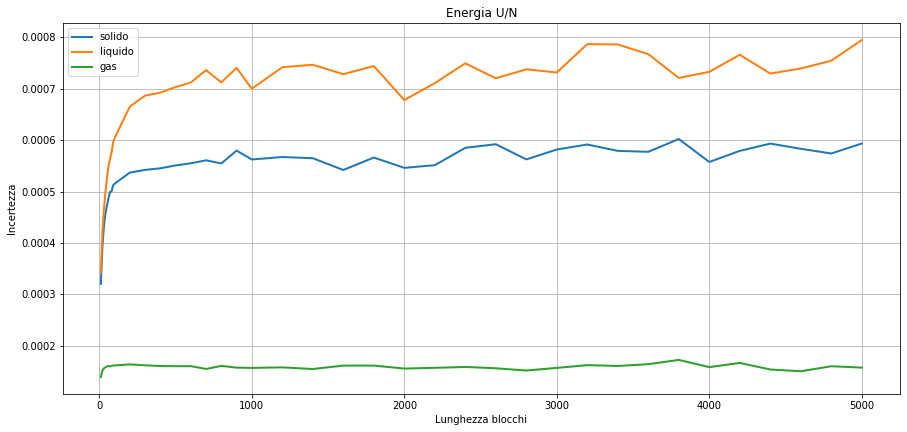

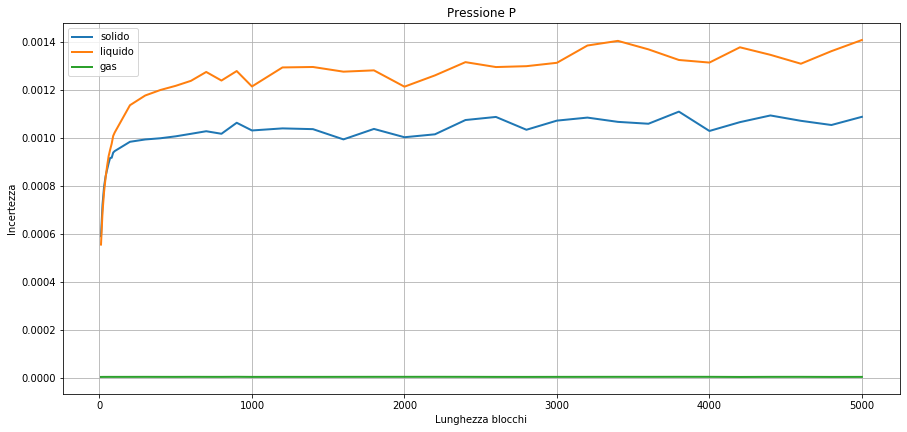

In [56]:
import math
import numpy as np
import matplotlib.pyplot as plt

#solido
L, Es = np.loadtxt('Files/solid/DB_ene.out', delimiter=' ', unpack=True)
L, Ps = np.loadtxt('Files/solid/DB_pres.out', delimiter=' ', unpack=True)
#liquido
L, El = np.loadtxt('Files/liquid/DB_ene.out', delimiter=' ', unpack=True)
L, Pl = np.loadtxt('Files/liquid/DB_pres.out', delimiter=' ', unpack=True)
#gas
L, Eg = np.loadtxt('Files/gas/DB_ene.out', delimiter=' ', unpack=True)
L, Pg = np.loadtxt('Files/gas/DB_pres.out', delimiter=' ', unpack=True)

plt.figure(figsize=(15, 15))
plt.subplot(211)
plt.plot(L, Es, lw=2, label='solido')
plt.plot(L, El, lw=2, label='liquido')
plt.plot(L, Eg, lw=2, label='gas')
plt.title('Energia U/N')
plt.xlabel('Lunghezza blocchi')
plt.ylabel('Incertezza')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(15, 15))
plt.subplot(212)
plt.plot(L, Ps, lw=2, label='solido')
plt.plot(L, Pl, lw=2, label='liquido')
plt.plot(L, Pg, lw=2, label='gas')
plt.title('Pressione P')
plt.xlabel('Lunghezza blocchi')
plt.ylabel('Incertezza')
plt.grid(True)
plt.legend()
plt.show()